<a href="https://colab.research.google.com/github/xuxiufeng/Blockchain_Simulation_Multiple_Hackers_with_Resetting_Times/blob/main/Exponential-Exponential-Exponential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
np.random.seed(1)

In [9]:
k = 5

Generate $k$ $\lambda$s: $\lambda_1, \dots, \lambda_k$.

In [103]:
lambda_list = np.random.uniform(7,9,k)
lambda_list

array([7.04061456, 8.44319485, 8.7226834 , 7.49492496, 8.78709396])

For $X\sim Exp(\lambda_j)$, we have
\begin{eqnarray*}
f(x)=\lambda_j e^{-\lambda_j x }, \quad x>0.
\end{eqnarray*}

In [104]:
def ET_m(m, lambda_list, delta, eta):
    def Generate_Z(m, lambda_list):
        sum_of_x_list = []
        for i in range(len(lambda_list)):
            sum_of_x_list.append(np.sum(np.random.exponential(1/lambda_list[i], m)))
        Z = min(sum_of_x_list)
        return Z
    def T_m(m, lambda_list, delta, eta):
        sum_of_time = 0
        sum_of_w = 0
        y = np.random.exponential(1/delta)
        w = np.random.exponential(1/eta)
        Z_m = Generate_Z(m, lambda_list)
        while Z_m > y:
            sum_of_time = sum_of_time + y + w
            sum_of_w += w
            Z_m = Generate_Z(m, lambda_list)
            y = np.random.exponential(1/delta)
            w = np.random.exponential(1/eta)
        return sum_of_time + Z_m, sum_of_w

    ET = np.repeat(np.nan, m)
    sum_w = np.repeat(np.nan, m)
    for i in range(m):
        T_0 = 0
        W_0 = 0
        iter = 30000 # iter 30000
        for j in range(iter):
            T_0 += T_m(i+1, lambda_list, delta, eta)[0]
            W_0 += T_m(i+1, lambda_list, delta, eta)[1]
        ET[i] = T_0/iter
        sum_w[i] = W_0/iter
        print(ET[i])
    return ET, sum_w

0.04228194735468814
0.14483739355138076
0.27521504604320485
0.42198652805285475
0.5880683750779271
0.7499756998971921
0.9371075621345812
1.1312509699503568
1.317439548433263
1.5219868447416232
1.732009140952893
1.9785077397248672
2.229423568235803
2.4761914899677335
2.7260758646894607
3.0061894331576067
3.28895321144156
3.5640430136797336
3.8636103850634362
4.140252342728569
4.522544545689333
4.820637908794981
5.15433826812493
5.517002176032252
5.853413143369524
6.324861462440596
6.636464357049703
7.1123603067489825
7.586671540496921
8.034957086459569
8.454507456768647
8.940105951131436
9.462033530467842
9.988484772942236
10.505673892889195
11.06462998433323
11.670328037800545
12.150655205892432
12.867291613395915
13.559547813985926


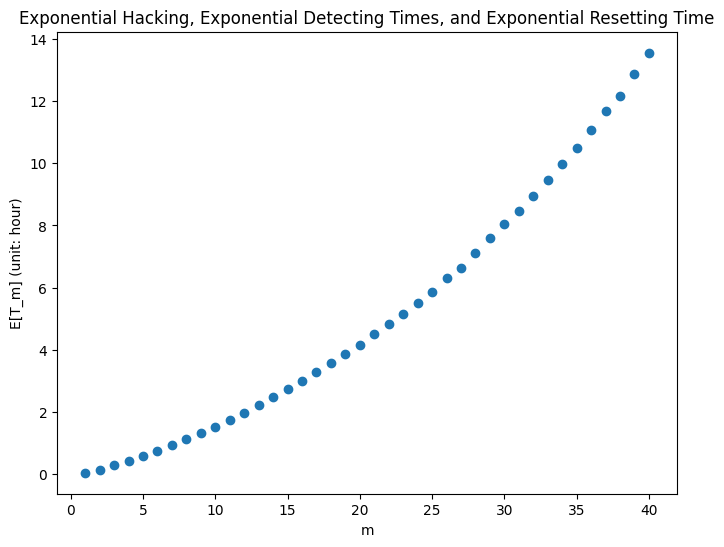

In [105]:
m = 40
delta = 1/3
eta = 1/2
ET_m, sum_w = ET_m(m, lambda_list, delta, eta)
fig = plt.figure(figsize=(8, 6))
plt.scatter(range(1, m+1), ET_m)
plt.xlabel(r'm')
plt.ylabel(r'E[T_m] (unit: hour)')
plt.title('Exponential Hacking, Exponential Detecting Times, and Exponential Resetting Time')
plt.show()

In [128]:
R = [1.2*c for c in range(1, m+1)]
C_2 = [.5*c**1.3 for c in range(1, m+1)]
C_1 = [.22*c**.8  for c in range(1, m+1)]
E_mNR = np.repeat(np.nan, len(ET_m))
for j in range(m):
  E_mNR[j] = ((ET_m[j]-sum_w[j])*(R[j] - C_2[j]) - C_1[j]*sum_w[j])/ET_m[j]
m_max = np.where(E_mNR == max(E_mNR))[0][0] + 1
print(m_max, max(E_mNR))
E_mNR

7 0.8827382684115015


array([ 0.34066499,  0.49018563,  0.6606636 ,  0.76798671,  0.86329338,
        0.87538188,  0.88273827,  0.80875948,  0.76405413,  0.6542395 ,
        0.52095641,  0.44988165,  0.25956916,  0.0958987 , -0.09080126,
       -0.31426776, -0.53483587, -0.79217917, -1.03141825, -1.31231886,
       -1.59333222, -1.87794933, -2.20144267, -2.51981199, -2.85503213,
       -3.20387973, -3.55591928, -3.92976272, -4.31719332, -4.71294066,
       -5.11839045, -5.5050937 , -5.9507992 , -6.42972735, -6.84069248,
       -7.26222133, -7.73035537, -8.17544148, -8.69524151, -9.12889544])

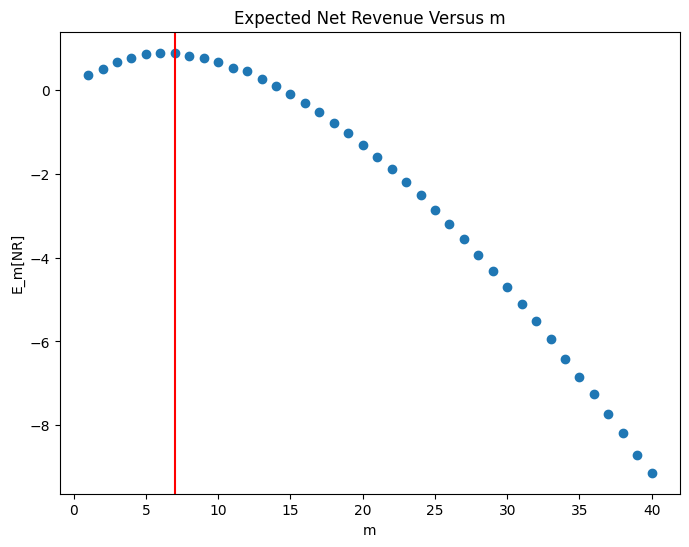

In [129]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(range(1, m+1), E_mNR)
plt.axvline(x = m_max, c='red')
plt.xlabel(r'm')
plt.ylabel(r'E_m[NR]')
plt.title(r'Expected Net Revenue Versus m')
plt.show()